In [ ]:
!pip install ucimlrepo
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets
y[y > 1] = 1
y = pd.DataFrame(y)

<ipython-input-2-aeb451ff3df1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y > 1] = 1
<ipython-input-2-aeb451ff3df1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y > 1] = 1


# Exploratory Data Analysis


In [ ]:
print(X.shape)
print(y.shape)

(303, 13)
(303, 1)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


Comment 1: Features ca and thal have missing values. We will use the median value to replace the missing values.

In [ ]:
X.ca.fillna(value = X.ca.median(), inplace=True)
X.thal.fillna(value = X.thal.median(), inplace=True)

<ipython-input-6-01df249f0bf8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.ca.fillna(value = X.ca.median(), inplace=True)
<ipython-input-6-01df249f0bf8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.thal.fillna(value = X.thal.median(), inplace=True)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


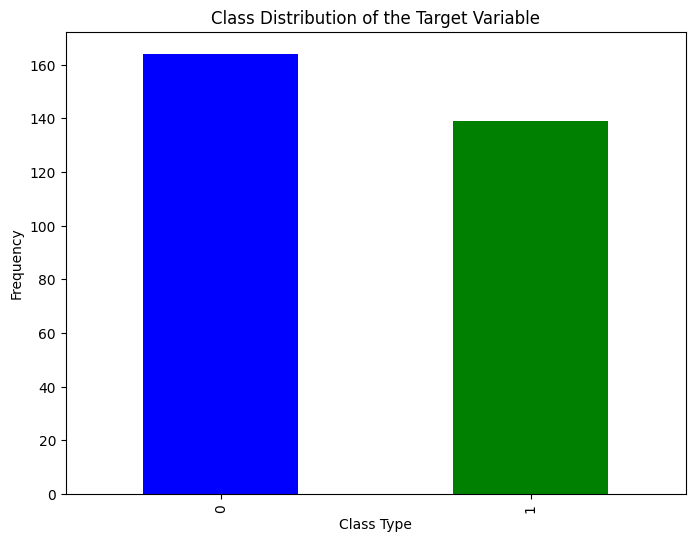

In [ ]:
import matplotlib.pyplot as plt

counts = y.value_counts()

plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color=['blue', 'green'])
plt.title("Class Distribution of the Target Variable")
plt.xlabel("Class Type")
plt.ylabel("Frequency")
plt.xticks([0, 1], labels=["0", "1"])
plt.show()


In [ ]:
diff = 100*(counts[0] - counts[1])/((counts[0] + counts[1])/2)
print(diff)

16.501650165016503


The class imbalance is very low as the percentage difference between classes 0 and 1 is only 16.5%. Therefore, we can carry on without resampling.

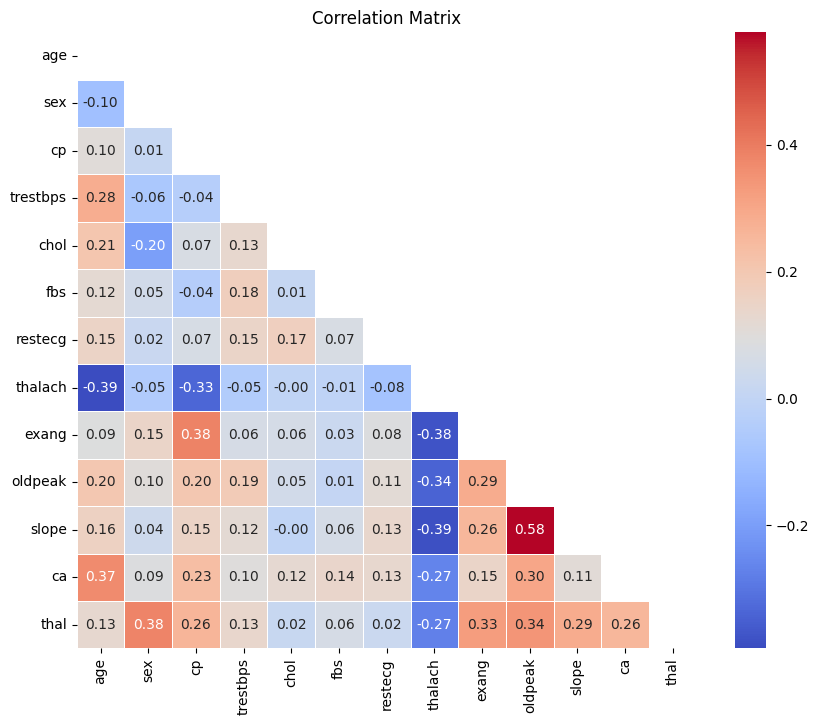

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Correlation Matrix')
plt.show()


The data seems correlated. The feature thalach seems most strongly correlated with all the other features.

# Data Preprocessing

In [ ]:
# Scaling the data


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = y

In [ ]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=12)

# X_pca = pca.fit_transform(X_scaled)
# y_pca = y_scaled

In [ ]:
# print(X_pca.shape)
# print(y_pca.shape)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=77)

In [ ]:
print(X_train.shape)

(242, 13)


# Training and Testing

Training Decision Trees on entropy and gini coefficient

In [ ]:
from sklearn.metrics import classification_report
def model_fitting(model, X_train, X_test, y_train, y_test):

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    train_accuracy = round(model.score(X_train, y_train), 3)
    test_accuracy = round(model.score(X_test, y_test), 3)
    report = classification_report(y_test, y_pred)

    return train_accuracy, test_accuracy, report

In [ ]:
from sklearn.tree import DecisionTreeClassifier

gini_decision_tree = DecisionTreeClassifier(criterion='gini')
entropy_decision_tree = DecisionTreeClassifier(criterion='entropy')

train1, test1, report = model_fitting(gini_decision_tree, X_train, X_test, y_train, y_test)
train2, test2, report = model_fitting(entropy_decision_tree, X_train, X_test, y_train, y_test)

print(train1, test1)
print(train2, test2)

1.0 0.77
1.0 0.721


Entropy gives a higher accuracy than Gini, therefore moving forward we will be using it as our criterion

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'min_samples_split': list(range(2, 10)),
    'max_features': list(range(1, 14))
}


model = DecisionTreeClassifier(criterion='entropy')

grid_search = GridSearchCV(model, param_grid, scoring= 'accuracy', cv=5)

grid_search.fit(X_train, y_train)

best_min_samples = grid_search.best_params_['min_samples_split']
best_max_features = grid_search.best_params_['max_features']


final_model = DecisionTreeClassifier(min_samples_split=best_min_samples, max_features=best_max_features)

train_accuracy, test_accuracy, report = model_fitting(final_model, X_train, X_test, y_train, y_test)


In [ ]:
print(best_min_samples)
print(best_max_features)
print(train_accuracy, test_accuracy)

4
2
0.959 0.803


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=None)
train_accuracy, test_accuracy, report = model_fitting(rf_classifier, X_train, X_test, y_train, y_test)

<ipython-input-24-843449273a9e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


In [ ]:
print(train_accuracy, test_accuracy)

1.0 0.803


In [ ]:
# n_estimators = [100, 200, 300, 400]
# max_depth = [3, 5, 7, 9, 11, 13]
# min_samples = [2, 5, 8, 11]

# highest_accuracy = 0
# best_n_estimators = n_estimators[0]
# best_max_depth = max_depth[0]
# best_min_samples = min_samples[0]

# for i in n_estimators:
#     for j in max_depth:
#         for k in min_samples:
#             rf_classifier = RandomForestClassifier(n_estimators=i, criterion="entropy", max_depth=j, min_samples_split=k)
#             train_accuracy, test_accuracy, report = model_fitting(rf_classifier, X_train, X_test, y_train.values.ravel(), y_test)

#             print("n_estimators:", i, "max_depth:", j, "min_samples:", k, "test_accuracy:", test_accuracy)

#             if test_accuracy > highest_accuracy:
#                 highest_accuracy = test_accuracy
#                 best_n_estimators = i
#                 best_max_depth = j
#                 best_min_samples = k

# print("Highest Accuracy:", highest_accuracy)
# print("Best n_estimators:", best_n_estimators)
# print("Best max_depth:", best_max_depth)
# print("Best min_samples:", best_min_samples)


In [ ]:
# final_rf_model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_split=best_min_samples)

# train_accuracy, test_accuracy = model_fitting(final_rf_model, X_train, X_test, y_train, y_test)

# print(train_accuracy, test_accuracy)

In [ ]:
param_grid = {
   'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9, 11, 13],
    'min_samples_split': [2, 5, 8, 11]
}

rf_classifier = RandomForestClassifier(criterion='entropy')

grid_search = GridSearchCV(rf_classifier, param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train, y_train)

best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']
best_min_samples = grid_search.best_params_['min_samples_split']

final_rf_model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_split=best_min_samples)

train_accuracy, test_accuracy, report = model_fitting(final_rf_model, X_train, X_test, y_train, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [ ]:
print(best_n_estimators, best_max_depth, best_min_samples)
print(train_accuracy, test_accuracy)

100 3 8
0.88 0.803


In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        32
           1       0.84      0.72      0.78        29

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

